<a href="https://colab.research.google.com/github/srirs/BA--predictive-analysis/blob/main/BA_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')
#importing pandas for data manipulation
import pandas as pd

Mounted at /content/drive


In [ ]:
#reading the data from drive as a dataframe using pandas
data = pd.read_csv('/content/drive/My Drive/basecond/customer_booking.csv', encoding="ISO-8859-1")
print(data.head())

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

In [ ]:
#printing information about the data to find insights
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

    num_passengers = number of passengers travelling
    sales_channel = sales channel booking was made on
    trip_type = trip Type (Round Trip, One Way, Circle Trip)
    purchase_lead = number of days between travel date and booking date
    length_of_stay = number of days spent at destination
    flight_hour = hour of flight departure
    flight_day = day of week of flight departure
    route = origin -> destination flight route
    booking_origin = country from where booking was made
    wants_extra_baggage = if the customer wanted extra baggage in the booking
    wants_preferred_seat = if the customer wanted a preferred seat in the booking
    wants_in_flight_meals = if the customer wanted in-flight meals in the booking
    flight_duration = total duration of flight (in hours)
    booking_complete = flag indicating if the customer completed the booking

In [ ]:
#converting the flight day column from string to integer/for that displaying the unique values of the column
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
#naming the each values as seperate integers
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day"] = data["flight_day"].map(mapping)
data.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,4,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,1,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,7,AKLDEL,India,0,0,0,5.52,0


In [ ]:
#describing the dataset using pandas function which can provide statistics of numerical variables
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


<ipython-input-81-f4676721f85d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


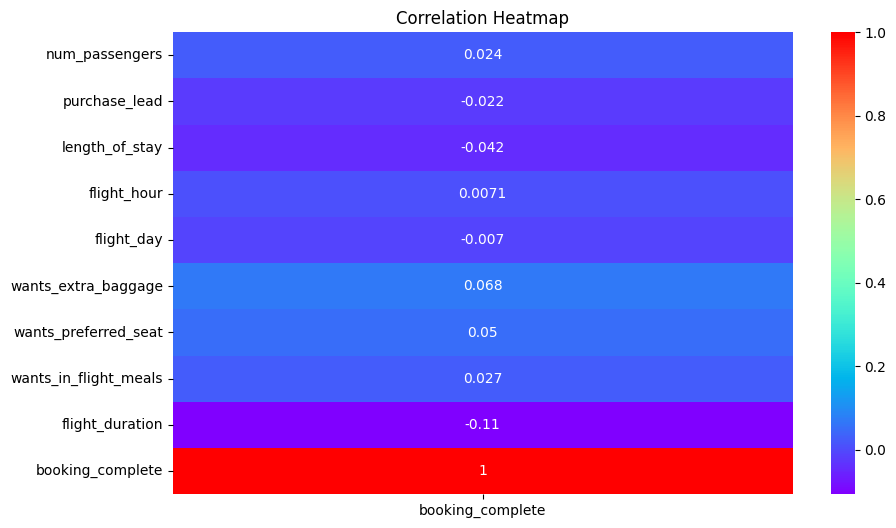

In [ ]:
#importing libraries for plotting the correlation of the variables with integer and float data type to the target variable
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['booking_complete']], annot=True, cmap='rainbow')
plt.title('Correlation Heatmap')
plt.show()

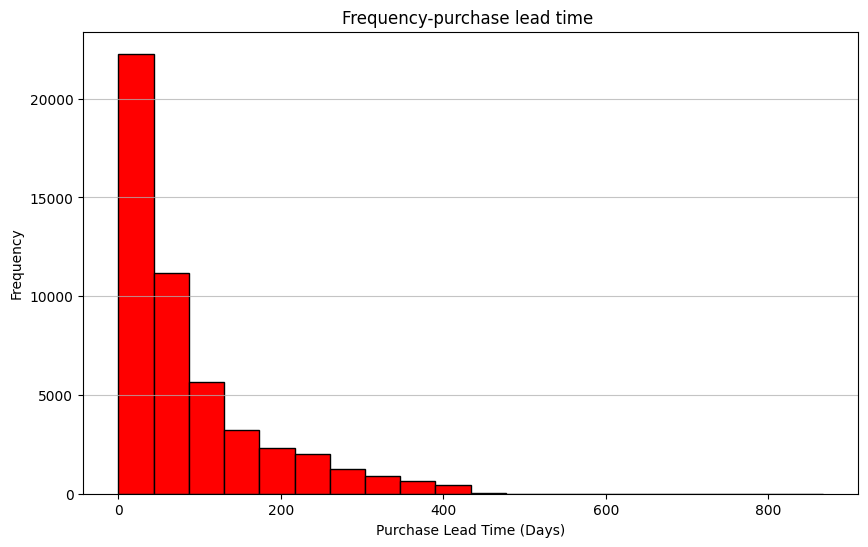

In [ ]:

# Plotting the histogram to see the distribution of purchase lead variable
plt.figure(figsize=(10, 6))
plt.hist(data['purchase_lead'], bins=20, color='red', edgecolor='black')
plt.title('Frequency-purchase lead time ')
plt.xlabel('Purchase Lead Time (Days)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

From the above figure,
 Frequency of people booking thier flights is

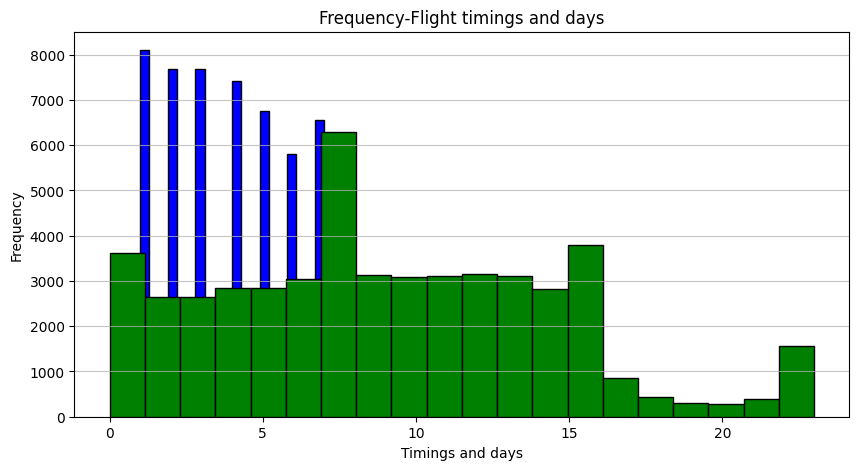

In [ ]:
#plotting the distribution of timigs and days through histogram
plt.figure(figsize=(10,5))
plt.hist(data['flight_day'], bins=20, color='blue', edgecolor='black')
plt.hist(data['flight_hour'], bins=20, color='green', edgecolor='black')
plt.title('Frequency-Flight timings and days')
plt.xlabel('Timings and days')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

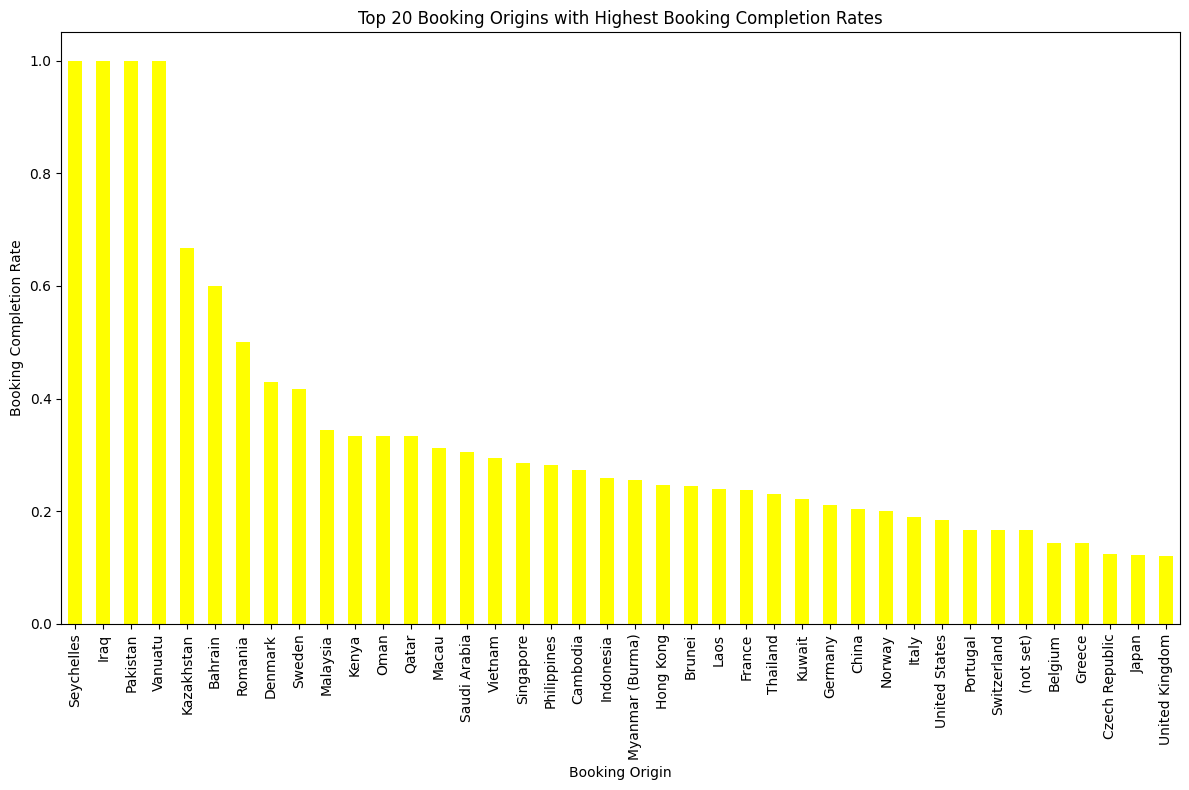

In [ ]:


# Calculate the completion rate for each booking origin
origin_completion_rate = data.groupby('booking_origin')['booking_complete'].mean().sort_values(ascending=False)

# Select the top 40 booking origins
top_20_origins = origin_completion_rate.head(40)

# Create a bar chart
plt.figure(figsize=(12, 8))
top_20_origins.plot(kind='bar', color='Yellow')
plt.title('Top 20 Booking Origins with Highest Booking Completion Rates')
plt.xlabel('Booking Origin')
plt.ylabel('Booking Completion Rate')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()




From the above figure,
    Booking completion rate is Higher in seychelles and UK secures last place in top 40 countries.
    we can also see that few customers havent set the booking origin and their completion rate is nearly 0.2

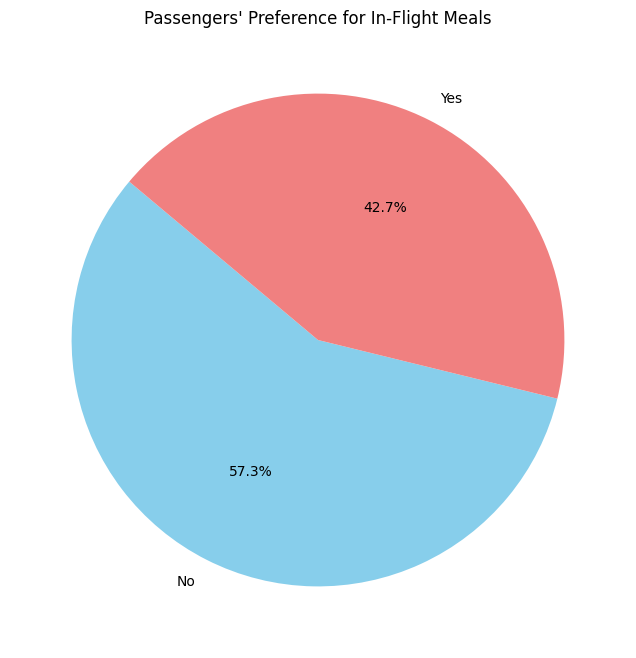

In [ ]:
# Count the number of passengers who want in-flight meals and those who don't
meal_counts = data['wants_in_flight_meals'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(meal_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Passengers\' Preference for In-Flight Meals')

# Show the plot
plt.show()

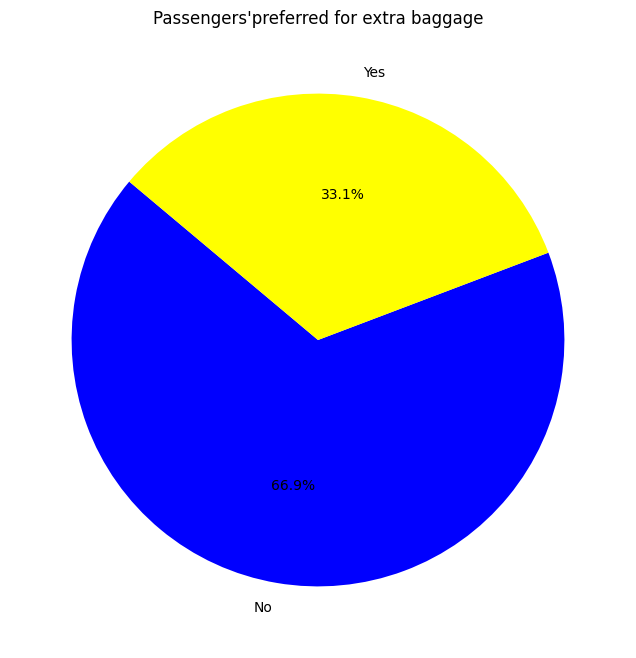

In [ ]:
# Count the number of passengers who want extra baggage and those who don't
extra_baggage = data['wants_extra_baggage'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(extra_baggage, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['blue', 'yellow'], startangle=140)
plt.title('Passengers\'preferred for extra baggage')

# Show the plot
plt.show()

In [ ]:
# Calculate the correlation between 'length_of_stay' and 'wants_extra_baggage' to see whether legth of stay affects extra baggage variable
correlation = data['length_of_stay'].corr(data['wants_extra_baggage'])

print(f"Correlation between Length of Stay and Wants Extra Baggage: {correlation:.2f}")


Correlation between Length of Stay and Wants Extra Baggage: 0.18


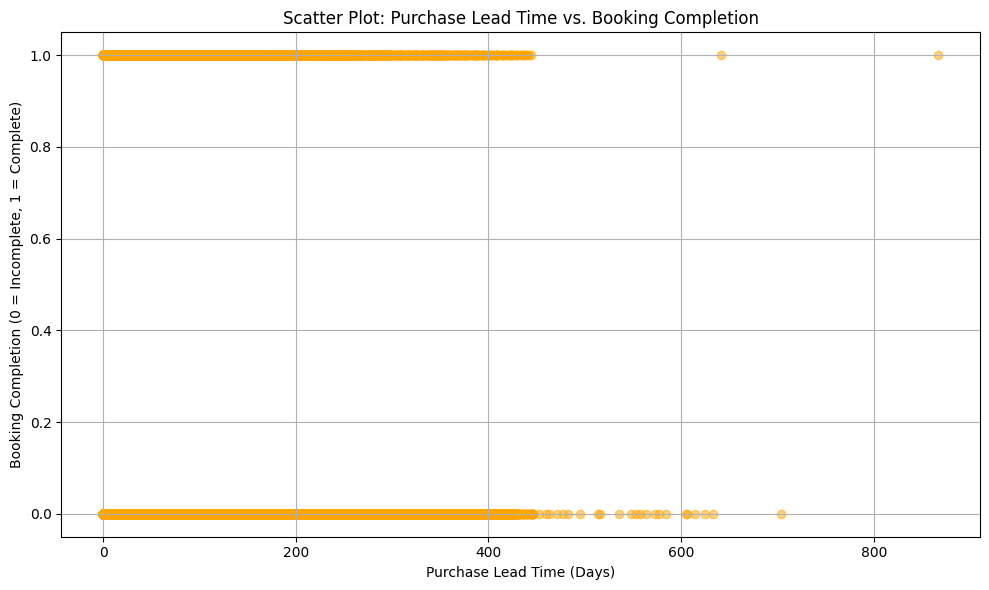

In [ ]:

# Creating a scatter plot to see factors affecting purchase lead and booking
plt.figure(figsize=(10, 6))
plt.scatter(data['purchase_lead'], data['booking_complete'], alpha=0.5, color='orange')

# Set labels and title
plt.title('Scatter Plot: Purchase Lead Time vs. Booking Completion')
plt.xlabel('Purchase Lead Time (Days)')
plt.ylabel('Booking Completion (0 = Incomplete, 1 = Complete)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


From the above figure, the hue level in both outcomes of target variable is affected by purchase lead.

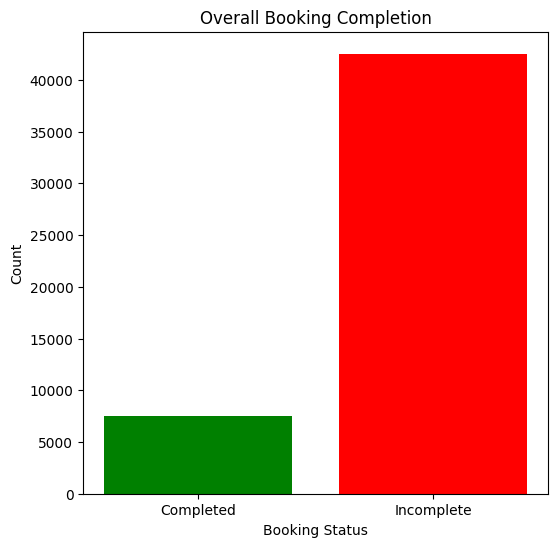

In [ ]:
import matplotlib.pyplot as plt

# Count the number of completed and incomplete bookings
completed_count = len(data[data['booking_complete'] == 1])
incomplete_count = len(data[data['booking_complete'] == 0])

# Create a bar plot
plt.figure(figsize=(6, 6))
plt.bar(['Completed', 'Incomplete'], [completed_count, incomplete_count], color=['green', 'red'])
plt.title('Overall Booking Completion')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()


From the above bar plot, less than 10000 people completes the booking transaction

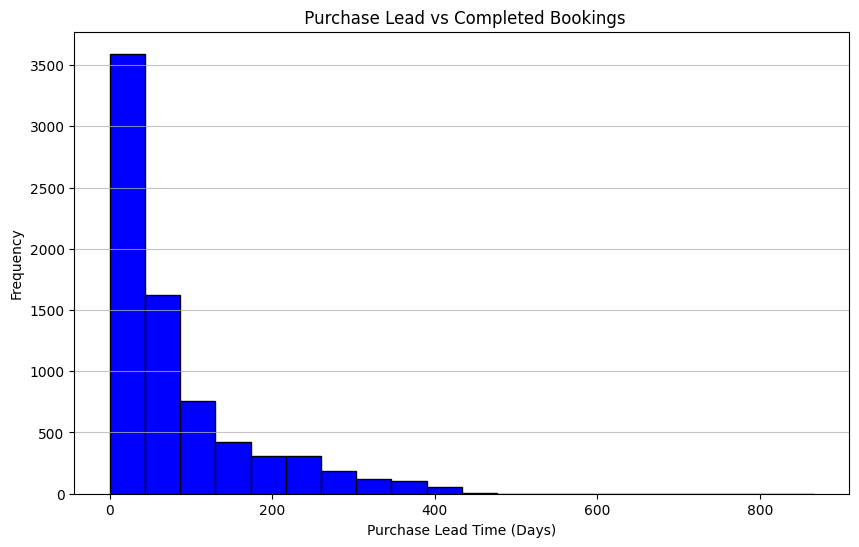

In [ ]:

#visualising the completed booking's purchase lead time
# Filter the DataFrame to include only completed bookings
completed_bookings = data[data['booking_complete'] == 1]

# Create a histogram of purchase lead times for completed bookings
plt.figure(figsize=(10, 6))
plt.hist(completed_bookings['purchase_lead'], bins=20, color='blue', edgecolor='black')
plt.title(' Purchase Lead vs Completed Bookings')
plt.xlabel('Purchase Lead Time (Days)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


From the above figure,

    In overall 5000+ completed bookings , 3500+ were 0-50 days purchase lead category.
    summarizing from the given data, people who had scheduled thier flight in less 50 days from thier booking date has higher transaction success rate

In [ ]:
#now preparing the data set for predictive modelling
#converting other columns with string data to integer that might be important for the predictive modelling
#starting with trip type
data["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
#converting strings to integer using mapping
changing = {
    "RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay": 3,
}

data["trip_type"] = data["trip_type"].map(changing)
data.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,1,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,1,201,33,6,4,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,1,238,19,14,1,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,1,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,1,378,30,12,7,AKLDEL,India,0,0,0,5.52,0


In [ ]:
#eventhough sales channel is not as important as other data, it is necesssary to see whether it can affect predictive modelling
data["sales_channel"].unique()


array(['Internet', 'Mobile'], dtype=object)

In [ ]:
sale = {
    "Internet": 1,
    "Mobile": 2,
}

data["sales_channel"] = data["sales_channel"].map(sale)
data.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
5,1,1,1,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,1,1,201,33,6,4,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,1,1,238,19,14,1,AKLDEL,India,1,0,1,5.52,0
8,1,1,1,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,2,1,378,30,12,7,AKLDEL,India,0,0,0,5.52,0


    We can easily drop the route and booking origin columns aboveto create the predictive model,
    but these columns might have potential to affect the acccuracy of predictive model,
    if we convert those data to numbers there is a chance of improving the model perfomance

In [ ]:
data["route"].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [ ]:
#mapping route column
route_change ={
    'AKLDEL': 1, 'AKLHGH': 2, 'AKLHND': 3, 'AKLICN': 4, 'AKLKIX': 5, 'AKLKTM': 6,
    'AKLKUL': 7, 'AKLMRU': 8, 'AKLPEK': 9, 'AKLPVG': 10, 'AKLTPE': 11, 'AORICN': 12,
    'AORKIX': 13, 'AORKTM': 14, 'AORMEL': 15, 'BBIMEL': 16, 'BBIOOL': 17, 'BBIPER': 18,
    'BBISYD': 19, 'BDOCTS': 20, 'BDOCTU': 21, 'BDOHGH': 22, 'BDOICN': 23, 'BDOIKA': 24,
    'BDOKIX': 25, 'BDOMEL': 26, 'BDOOOL': 27, 'BDOPEK': 28, 'BDOPER': 29, 'BDOPUS': 30,
    'BDOPVG': 31, 'BDOSYD': 32, 'BDOTPE': 33, 'BDOXIY': 34, 'BKICKG': 35, 'BKICTS': 36,
    'BKICTU': 37, 'BKIHND': 38, 'BKIICN': 39, 'BKIKIX': 40, 'BKIKTM': 41, 'BKIMEL': 42,
    'BKIMRU': 43, 'BKIOOL': 44, 'BKIPEK': 45, 'BKIPER': 46, 'BKIPUS': 47, 'BKIPVG': 48,
    'BKISYD': 49, 'BKIXIY': 50, 'BLRICN': 51, 'BLRMEL': 52, 'BLRPER': 53, 'BLRSYD': 54,
    'BOMMEL': 55, 'BOMOOL': 56, 'BOMPER': 57, 'BOMSYD': 58, 'BTJJED': 59, 'BTUICN': 60,
    'BTUPER': 61, 'BTUSYD': 62, 'BTUWUH': 63, 'BWNCKG': 64, 'BWNDEL': 65, 'BWNHGH': 66,
    'BWNIKA': 67, 'BWNKTM': 68, 'BWNMEL': 69, 'BWNOOL': 70, 'BWNPER': 71, 'BWNSYD': 72,
    'BWNTPE': 73,'CANDEL': 100, 'CANIKA': 101, 'CANMEL': 102, 'CANMRU': 103, 'CANOOL': 104,
    'CANPER': 105, 'CANSYD': 106, 'CCUMEL': 107, 'CCUMRU': 108, 'CCUOOL': 109, 'CCUPER': 110,
    'CCUSYD': 111, 'CCUTPE': 112, 'CEBMEL': 113, 'CEBOOL': 114, 'CEBPER': 115, 'CEBSYD': 116,
    'CGKCKG': 117, 'CGKCTS': 118, 'CGKCTU': 119, 'CGKDEL': 120, 'CGKHGH': 121, 'CGKHND': 122,
    'CGKICN': 123, 'CGKIKA': 124, 'CGKJED': 125, 'CGKKIX': 126, 'CGKKTM': 127, 'CGKMEL': 128,
    'CGKMRU': 129, 'CGKOOL': 130, 'CGKPEK': 131, 'CGKPER': 132, 'CGKPUS': 133, 'CGKPVG': 134,
    'CGKSYD': 135, 'CGKTPE': 136, 'CGKWUH': 137, 'CGKXIY': 138, 'CKGCOK': 139, 'CKGDPS': 140,
    'CKGJHB': 141, 'CKGKCH': 142, 'CKGLOP': 143, 'CKGMAA': 144, 'CKGMEL': 145, 'CKGMYY': 146,
    'CKGOOL': 147, 'CKGPEN': 148, 'CKGPER': 149, 'CKGPNH': 150, 'CKGSBW': 151, 'CKGSIN': 152,
    'CKGSUB': 153, 'CKGSYD': 154, 'CKGTGG': 155, 'CKGTRZ': 156, 'CKGTWU': 157, 'CMBCTS': 158,
    'CMBCTU': 159, 'CMBHGH': 160, 'CMBHND': 161, 'CMBICN': 162, 'CMBKIX': 163, 'CMBMEL': 164,
    'CMBMRU': 165, 'CMBOOL': 166, 'CMBPEK': 167, 'CMBPER': 168, 'CMBPVG': 169, 'CMBSYD': 170,
    'CMBWUH': 171, 'CNXHND': 172, 'CNXICN': 173, 'CNXKIX': 174, 'CNXMEL': 175, 'CNXOOL': 176,
    'CNXPEK': 177, 'CNXPER': 178, 'CNXPVG': 179, 'CNXSYD': 180, 'CNXTPE': 181, 'COKCTU': 182,
    'COKHGH': 183, 'COKICN': 184, 'COKKIX': 185, 'COKMEL': 186, 'COKOOL': 187, 'COKPER': 188,
    'COKPUS': 189, 'COKSYD': 190, 'COKTPE': 191, 'COKWUH': 192, 'CRKMEL': 193, 'CRKOOL': 194,
    'CRKSYD': 195, 'CSXPER': 196, 'CTSDMK': 197, 'CTSDPS': 198, 'CTSHKT': 199, 'CTSJHB': 200,
    'CTSKBR': 201, 'CTSKCH': 202, 'CTSKNO': 203, 'CTSLGK': 204, 'CTSMEL': 205, 'CTSMYY': 206,
    'CTSOOL': 207, 'CTSPEN': 208, 'CTSPER': 209, 'CTSSGN': 210, 'CTSSIN': 211, 'CTSSUB': 212,
    'CTSSYD': 213, 'CTUDPS': 214, 'CTUHKT': 215, 'CTUIKA': 216, 'CTUJHB': 217, 'CTUKBV': 218,
    'CTUKCH': 219, 'CTUKNO': 220, 'CTUMAA': 221, 'CTUMEL': 222, 'CTUMRU': 223, 'CTUMYY': 224,
    'CTUOOL': 225, 'CTUPEN': 226, 'CTUPER': 227, 'CTUSBW': 228, 'CTUSIN': 229, 'CTUSUB': 230,
    'CTUSYD': 231, 'CTUTGG': 232, 'CTUTRZ': 233, 'CTUTWU': 234, 'CXRMEL': 235, 'DACHGH': 236,
    'DACHND': 237, 'DACICN': 238, 'DACKIX': 239, 'DACMEL': 240, 'DACOOL': 241, 'DACPER': 242,
    'DACSYD': 243, 'DACTPE': 244, 'DADMEL': 245, 'DADOOL': 246, 'DADSYD': 247, 'DELDMK': 248,
    'DELDPS': 249, 'DELHKG': 250, 'DELHKT': 251, 'DELHND': 252, 'DELJHB': 253, 'DELJOG': 254,
    'DELKBV': 255, 'DELKCH': 256, 'DELKIX': 257, 'DELKNO': 258, 'DELLGK': 259, 'DELMEL': 260,
    'DELMFM': 261, 'DELMNL': 262, 'DELMRU': 263, 'DELMYY': 264, 'DELOOL': 265, 'DELPEN': 266,
    'DELPER': 267, 'DELPNH': 268, 'DELSBW': 269, 'DELSGN': 270, 'DELSIN': 271, 'DELSUB': 272,
    'DELSYD': 273, 'DELSZX': 274, 'DMKHGH': 275, 'DMKHND': 276, 'DMKICN': 277, 'DMKIKA': 278,
    'DMKKIX': 279, 'DMKKTM': 280, 'DMKMEL': 281, 'DMKMRU': 282, 'DMKOOL': 283, 'DMKPEK': 284,
    'DMKPER': 285, 'DMKPUS': 286, 'DMKPVG': 287, 'DMKSYD': 288, 'DMKTPE': 289, 'DPSHGH': 290,
    'DPSHND': 291, 'DPSICN': 292, 'DPSIKA': 293, 'DPSKIX': 294, 'DPSKTM': 295, 'DPSMEL': 296,
    'DPSMRU': 297, 'DPSOOL': 298, 'DPSPEK': 299, 'DPSPUS': 300, 'DPSPVG': 301, 'DPSSYD': 302,
    'DPSTPE': 303, 'DPSXIY': 304, 'GOIKUL': 305, 'GOIMEL': 306, 'GOIOOL': 307, 'GOIPER': 308,
    'GOISYD': 309, 'HANKTM': 310, 'HANMEL': 311, 'HANOOL': 312, 'HANPER': 313, 'HANSYD': 314,
    'HDYHGH': 315, 'HDYKTM': 316, 'HDYMEL': 317, 'HDYOOL': 318, 'HDYPEK': 319, 'HDYPER': 320,
    'HDYPVG': 321, 'HDYSYD': 322, 'HDYTPE': 323, 'HGHHKT': 324, 'HGHJHB': 325, 'HGHJOG': 326,
    'HGHKBR': 327, 'HGHKBV': 328, 'HGHKCH': 329, 'HGHKNO': 330, 'HGHLGK': 331, 'HGHLOP': 332,
    'HGHMAA': 333, 'HGHMEL': 334, 'HGHMYY': 335, 'HGHOOL': 336, 'HGHPEN': 337, 'HGHPER': 338,
    'HGHSBW': 339, 'HGHSUB': 340, 'HGHSYD': 341, 'HGHTRZ': 342, 'HKGIKA': 343, 'HKGKTM': 344,
    'HKGMEL': 345, 'HKGMRU': 346, 'HKGOOL': 347, 'HKGPER': 348, 'HKGSYD': 349, 'HKTHND': 350,
    'HKTICN': 351, 'HKTKIX': 352, 'HKTKTM': 353, 'HKTMEL': 354, 'HKTMRU': 355, 'HKTOOL': 356,
    'HKTPEK': 357, 'HKTPER': 358, 'HKTPUS': 359, 'HKTPVG': 360, 'HKTSYD': 361, 'HKTTPE': 362,
    'HKTXIY': 363, 'HNDIKA': 364, 'HNDJOG': 365, 'HNDKBR': 366, 'HNDKBV': 367, 'HNDKCH': 368,
    'HNDKNO': 369, 'HNDKTM': 370, 'HNDLGK': 371, 'HNDLOP': 372, 'HNDMAA': 373, 'HNDMEL': 374,
    'HNDMLE': 375, 'HNDOOL': 376, 'HNDPEN': 377, 'HNDPER': 378, 'HNDPNH': 379, 'HNDREP': 380,
    'HNDRGN': 381, 'HNDSBW': 382, 'HNDSGN': 383, 'HNDSIN': 384, 'HNDSUB': 385, 'HNDSYD': 386,
    'HNDTRZ': 387, 'HYDMEL': 388, 'HYDOOL': 389, 'HYDPER': 390, 'HYDSYD': 391, 'HYDWUH': 392,
    'ICNIKA': 400, 'ICNJED': 401, 'ICNJHB': 402, 'ICNKBR': 403, 'ICNKBV': 404, 'ICNKCH': 405,
    'ICNKNO': 406, 'ICNKTM': 407, 'ICNLGK': 408, 'ICNMAA': 409, 'ICNMEL': 410, 'ICNMLE': 411,
    'ICNMYY': 412, 'ICNOOL': 413, 'ICNPEN': 414, 'ICNPER': 415, 'ICNREP': 416, 'ICNRGN': 417,
    'ICNSBW': 418, 'ICNSDK': 419, 'ICNSGN': 420, 'ICNSIN': 421, 'ICNSUB': 422, 'ICNSYD': 423,
    'ICNTRZ': 424, 'ICNVTZ': 425, 'IKAKCH': 426, 'IKAKIX': 427, 'IKALOP': 428, 'IKAMEL': 429,
    'IKAMFM': 430, 'IKAMNL': 431, 'IKAOOL': 432, 'IKAPEK': 433, 'IKAPEN': 434, 'IKAPER': 435,
    'IKAPUS': 436, 'IKAPVG': 437, 'IKASGN': 438, 'IKASIN': 439, 'IKASUB': 440, 'IKASYD': 441,
    'IKATPE': 442, 'JEDJOG': 443, 'JEDKNO': 444, 'JEDMEL': 445, 'JEDMNL': 446, 'JEDPDG': 447,
    'JEDPEN': 448, 'JEDSUB': 449, 'JHBKIX': 450, 'JHBKTM': 451, 'JHBMEL': 452, 'JHBMRU': 453,
    'JHBPEK': 454, 'JHBPUS': 455, 'JHBPVG': 456, 'JHBSYD': 457, 'JHBTPE': 458, 'JHBWUH': 459,
    'JHBXIY': 460, 'JOGKIX': 461, 'JOGKTM': 462, 'JOGMEL': 463, 'JOGOOL': 464, 'JOGPER': 465,
    'JOGPVG': 466, 'JOGSYD': 467, 'JOGTPE': 468, 'KBRKIX': 469, 'KBRKTM': 470, 'KBRMEL': 471,
    'KBROOL': 472, 'KBRPEK': 473, 'KBRPER': 474, 'KBRPVG': 475, 'KBRSYD': 476, 'KBRTPE': 477,
    'KBVKTM': 478, 'KBVMEL': 479, 'KBVOOL': 480, 'KBVPEK': 481, 'KBVPER': 482, 'KBVPVG': 483,
    'KBVSYD': 484, 'KCHKIX': 485, 'KCHKTM': 486, 'KCHMEL': 487, 'KCHMRU': 488, 'KCHOOL': 489,
    'KCHPEK': 490, 'KCHPER': 491, 'KCHPUS': 492, 'KCHPVG': 493, 'KCHSYD': 494, 'KCHTPE': 495,
    'KCHXIY': 496, 'KHHMEL': 497, 'KHHOOL': 498, 'KHHPER': 499, 'KHHSYD': 500, 'KIXKNO': 501,
    'KIXKTM': 502, 'KIXLGK': 503, 'KIXLOP': 504, 'KIXMAA': 505, 'KIXMEL': 506, 'KIXMLE': 507,
    'KIXMYY': 508, 'KIXOOL': 509, 'KIXPEN': 510, 'KIXPER': 511, 'KIXPNH': 512, 'KIXREP': 513,
    'KIXRGN': 514, 'KIXSBW': 515, 'KIXSGN': 516, 'KIXSIN': 517, 'KIXSUB': 518, 'KIXSYD': 519,
    'KIXTGG': 520, 'KIXTRZ': 521, 'KLOMEL': 522, 'KLOOOL': 523, 'KNOKTM': 524, 'KNOMEL': 525,
    'KNOOOL': 526, 'KNOPEK': 527, 'KNOPER': 528, 'KNOPUS': 529, 'KNOPVG': 530, 'KNOSYD': 531,
    'KNOTPE': 532, 'KNOXIY': 533, 'KOSMEL': 534, 'KOSOOL': 535, 'KOSPEK': 536, 'KOSSYD': 537,
    'KTMMEL': 538, 'KTMMFM': 539, 'KTMMYY': 540, 'KTMPEN': 541, 'KTMPER': 542, 'KTMREP': 543,
    'KTMSGN': 544, 'KTMSIN': 545, 'KTMSUB': 546, 'KTMSYD': 547, 'KTMTGG': 548, 'KTMTPE': 549,
    'KTMURT': 550, 'KWLPER': 551, 'LBUPER': 552, 'LGKMEL': 553, 'LGKOOL': 554, 'LGKPER': 555,
    'LGKPUS': 556, 'LGKPVG': 557, 'LGKSYD': 558, 'LGKTPE': 559, 'LOPOOL': 560, 'LOPPEK': 561,
    'LOPPVG': 562, 'LOPSYD': 563, 'LOPTPE': 564, 'LOPXIY': 565, 'LPQMEL': 566, 'LPQOOL': 567,
    'LPQPER': 568, 'LPQTPE': 569, 'MAAMEL': 570, 'MAAMRU': 571, 'MAAOOL': 572, 'MAAPER': 573,
    'MAAPVG': 574, 'MAASYD': 575, 'MAATPE': 576, 'MAAWUH': 577, 'MELMFM': 578, 'MELMLE': 579,
    'MELMNL': 580, 'MELMRU': 581, 'MELMYY': 582, 'MELPEK': 583, 'MELPEN': 584, 'MELPNH': 585,
    'MELPUS': 586, 'MELPVG': 587, 'MELREP': 588, 'MELRGN': 589, 'MELSBW': 590, 'MELSGN': 591,
    'MELSIN': 592, 'MELSUB': 593, 'MELSWA': 594, 'MELSZX': 595, 'MELTGG': 596, 'MELTPE': 597,
    'MELTRZ': 598, 'MELTWU': 599, 'MELURT': 600, 'MELUTP': 601, 'MELVTE': 602, 'MELVTZ': 603,
    'MELWUH': 604, 'MELXIY': 605, 'MFMOOL': 606, 'MFMPER': 607, 'MFMSYD': 608, 'MLEPEK': 609,
    'MLEPER': 610, 'MLESYD': 611, 'MNLMRU': 612, 'MNLOOL': 613, 'MNLPER': 614, 'MNLSYD': 615,
    'MRUOOL': 616, 'MRUPEK': 617, 'MRUPEN': 618, 'MRUPER': 619, 'MRUPVG': 620, 'MRUSGN': 621,
    'MRUSIN': 622, 'MRUSUB': 623, 'MRUSYD': 624, 'MRUSZX': 625, 'MYYOOL': 626, 'MYYPER': 627,
    'MYYPUS': 628, 'MYYSYD': 629, 'MYYXIY': 630, 'NRTSYD': 631, 'OOLPEK': 632, 'OOLPEN': 633,
    'OOLPNH': 634, 'OOLPUS': 635, 'OOLPVG': 636, 'OOLREP': 637, 'OOLRGN': 638, 'OOLSBW': 639,
    'OOLSDK': 640, 'OOLSGN': 641, 'OOLSIN': 642, 'OOLSUB': 643, 'OOLSZX': 644, 'OOLTGG': 645,
    'OOLTPE': 646, 'OOLTRZ': 647, 'OOLTWU': 648, 'OOLURT': 649, 'OOLUTP': 650, 'OOLVTE': 651,
    'OOLWUH': 652, 'OOLXIY': 653, 'PEKPEN': 654, 'PEKPER': 655, 'PEKREP': 656, 'PEKRGN': 657,
    'PEKSBW': 658, 'PEKSIN': 659, 'PEKSUB': 660, 'PEKSYD': 661, 'PEKTGG': 662, 'PEKTRZ': 663,
    'PEKTWU': 664, 'PENPER': 665, 'PENPUS': 666, 'PENPVG': 667, 'PENSYD': 668, 'PENTPE': 669,
    'PENWUH': 670, 'PENXIY': 671, 'PERPNH': 672, 'PERPUS': 673, 'PERPVG': 674, 'PERREP': 675,
    'PERRGN': 676, 'PERSBW': 677, 'PERSDK': 678, 'PERSGN': 679, 'PERSIN': 680, 'PERSWA': 681,
    'PERSZX': 682, 'PERTGG': 683, 'PERTPE': 684, 'PERTRZ': 685, 'PERTWU': 686, 'PERUTP': 687,
    'PERVTE': 688, 'PERVTZ': 689, 'PERWUH': 690, 'PERXIY': 691, 'PNHSYD': 692, 'PNHTPE': 693,
    'PNKTPE': 694, 'PUSRGN': 695, 'PUSSBW': 696, 'PUSSGN': 697, 'PUSSIN': 698, 'PUSSUB': 699,
    'PUSSYD': 700, 'PUSTRZ': 701, 'PVGREP': 702, 'PVGRGN': 703, 'PVGSIN': 704, 'PVGSUB': 705,
    'PVGSYD': 706, 'PVGTGG': 707, 'PVGTWU': 708, 'PVGURT': 709, 'REPSYD': 710, 'REPTPE': 711,
    'RGNSYD': 712, 'RGNTPE': 713, 'SBWSYD': 714, 'SBWTPE': 715, 'SBWXIY': 716, 'SDKSYD': 717,
    'SGNSYD': 718, 'SGNXIY': 719, 'SINSYD': 720, 'SINTPE': 721, 'SINWUH': 722, 'SINXIY': 723,
    'SRGTPE': 724, 'SUBSYD': 725, 'SUBTPE': 726, 'SUBXIY': 727, 'SYDSZX': 728, 'SYDTPE': 729,
    'SYDTRZ': 730, 'SYDTWU': 731, 'SYDVTE': 732, 'SYDVTZ': 733, 'SYDXIY': 734, 'TGGTPE': 735,
    'TGGXIY': 736, 'TPETRZ': 737, 'TPEVTE': 738, 'TRZWUH': 739, 'TRZXIY': 740, 'TWUXIY': 741,
    'HGHSGN': 742, 'ICNTGG': 743, 'JHBOOL': 744, 'KBRXIY': 745, 'KBVTPE': 746, 'KIXTWU': 747,
    'LBUTPE': 748, 'PVGSGN': 749, 'SBWWUH': 750, 'DELREP': 751, 'DPSWUH': 752, 'HKGJED': 753,
    'KBVKIX': 754, 'KBVPUS': 755, 'KIXLPQ': 756, 'LGKPEK': 757, 'LGKXIY': 758, 'LOPPER': 759,
    'PEKSGN': 760, 'PERSUB': 761, 'TPETWU': 762, 'BDOWUH': 763, 'BKIDEL': 764, 'CKGSGN': 765,
    'CTUKBR': 766, 'CTULGK': 767, 'CTUREP': 768, 'DACMRU': 769, 'DACPEK': 770, 'DELRGN': 771,
    'HDYXIY': 772, 'HGHTGG': 773, 'HKTWUH': 774, 'ICNVTE': 775, 'KBRPUS': 776, 'KCHWUH': 777,
    'KLOSYD': 778, 'KNOWUH': 779, 'MLETPE': 780, 'SDKTPE': 781, 'SUBWUH': 782, 'TWUWUH': 783,
    'AORPUS': 784, 'BTUCKG': 785, 'BWNWUH': 786, 'CKGKNO': 787, 'CKGLGK': 788, 'CNXDEL': 789,
    'CNXPUS': 790, 'CTSJOG': 791, 'CTSSBW': 792, 'CTUDMK': 793, 'CTULOP': 794, 'DELKBR': 795,
    'DELURT': 796, 'HDYKIX': 797, 'HGHSIN': 798, 'HGHTWU': 799, 'HYDMRU': 800, 'IKASZX': 801,
    'KBVWUH': 802, 'KBVXIY': 803, 'KIXLBU': 804, 'LGKWUH': 805, 'MELNRT': 806, 'MLEOOL': 807,
    'MRUTPE': 808, 'TPEURT': 809, 'URTXIY': 810, 'AORPER': 811, 'CKGHKT': 812, 'CKGMRU': 813,
    'CNXXIY': 814, 'COKCTS': 815, 'CSXMRU': 816, 'CSXSYD': 817, 'CTUMLE': 818, 'CTUSGN': 819,
    'CTUSRG': 820, 'CTUURT': 821, 'DACPUS': 822, 'HGHMRU': 823, 'HKTIKA': 824, 'HKTJED': 825,
    'ICNMRU': 826, 'JEDMFM': 827, 'KBRWUH': 828, 'KIXMRU': 829, 'KTMTWU': 830, 'MLEPVG': 831,
    'MRUXIY': 832}

# Map origins to numbers in the 'route' column
data['route'] = data['route'].map(route_change)

# Check the updated DataFrame
print(data)

       num_passengers  sales_channel  trip_type  purchase_lead  \
0                   2              1          1            262   
1                   1              1          1            112   
2                   2              1          1            243   
3                   1              1          1             96   
4                   2              1          1             68   
...               ...            ...        ...            ...   
49995               2              1          1             27   
49996               1              1          1            111   
49997               1              1          1             24   
49998               1              1          1             15   
49999               1              1          1             19   

       length_of_stay  flight_hour  flight_day  route booking_origin  \
0                  19            7           6      1    New Zealand   
1                  20            3           6      1    New Ze

In [ ]:
data["booking_origin"].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [ ]:
# Define a dictionary to map countries to numbers starting from 1000
country_to_number = {
    'New Zealand': 1000, 'India': 1001, 'United Kingdom': 1002, 'China': 1003, 'South Korea': 1004,
    'Japan': 1005, 'Malaysia': 1006, 'Singapore': 1007, 'Switzerland': 1008, 'Germany': 1009,
    'Indonesia': 1010, 'Czech Republic': 1011, 'Vietnam': 1012, 'Thailand': 1013, 'Spain': 1014,
    'Romania': 1015, 'Ireland': 1016, 'Italy': 1017, 'Slovakia': 1018, 'United Arab Emirates': 1019,
    'Tonga': 1020, 'Réunion': 1021, '(not set)': 1022, 'Saudi Arabia': 1023, 'Netherlands': 1024,
    'Qatar': 1025, 'Hong Kong': 1026, 'Philippines': 1027, 'Sri Lanka': 1028, 'France': 1029,
    'Croatia': 1030, 'United States': 1031, 'Laos': 1032, 'Hungary': 1033, 'Portugal': 1034,
    'Cyprus': 1035, 'Australia': 1036, 'Cambodia': 1037, 'Poland': 1038, 'Belgium': 1039, 'Oman': 1040,
    'Bangladesh': 1041, 'Kazakhstan': 1042, 'Brazil': 1043, 'Turkey': 1044, 'Kenya': 1045, 'Taiwan': 1046,
    'Brunei': 1047, 'Chile': 1048, 'Bulgaria': 1049, 'Ukraine': 1050, 'Denmark': 1051, 'Colombia': 1052,
    'Iran': 1053, 'Bahrain': 1054, 'Solomon Islands': 1055, 'Slovenia': 1056, 'Mauritius': 1057,
    'Nepal': 1058, 'Russia': 1059, 'Kuwait': 1060, 'Mexico': 1061, 'Sweden': 1062, 'Austria': 1063,
    'Lebanon': 1064, 'Jordan': 1065, 'Greece': 1066, 'Mongolia': 1067, 'Canada': 1068, 'Tanzania': 1069,
    'Peru': 1070, 'Timor-Leste': 1071, 'Argentina': 1072, 'New Caledonia': 1073, 'Macau': 1074,
    'Myanmar (Burma)': 1075, 'Norway': 1076, 'Panama': 1077, 'Bhutan': 1078, 'Norfolk Island': 1079,
    'Finland': 1080, 'Nicaragua': 1081, 'Maldives': 1082, 'Egypt': 1083, 'Israel': 1084, 'Tunisia': 1085,
    'South Africa': 1086, 'Papua New Guinea': 1087, 'Paraguay': 1088, 'Estonia': 1089, 'Seychelles': 1090,
    'Afghanistan': 1091, 'Guam': 1092, 'Czechia': 1093, 'Malta': 1094, 'Vanuatu': 1095,
    'Belarus': 1096, 'Pakistan': 1097, 'Iraq': 1098, 'Ghana': 1099, 'Gibraltar': 1100, 'Guatemala': 1101,
    'Algeria': 1102, 'Svalbard & Jan Mayen': 1103,
}
# Map originbs to numbers in the 'booking origin ' column
data['booking_origin'] = data['booking_origin'].map(country_to_number)

# Check the updated DataFrame
print(data)

       num_passengers  sales_channel  trip_type  purchase_lead  \
0                   2              1          1            262   
1                   1              1          1            112   
2                   2              1          1            243   
3                   1              1          1             96   
4                   2              1          1             68   
...               ...            ...        ...            ...   
49995               2              1          1             27   
49996               1              1          1            111   
49997               1              1          1             24   
49998               1              1          1             15   
49999               1              1          1             19   

       length_of_stay  flight_hour  flight_day  route  booking_origin  \
0                  19            7           6      1            1000   
1                  20            3           6      1        

In [ ]:
#checking the information to see whether all strings changed to int data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  int64  
 8   booking_origin         50000 non-null  int64  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.3 MB


In [ ]:
#importing libraries for predictive modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:

# Separate features (X) and target (y)
X = data.drop(columns=['booking_complete'])
y = data['booking_complete']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define a machine learning model
model = RandomForestClassifier(random_state=42)


# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)




In [ ]:
# Evaluate the model's performance

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division='warn')
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.54      0.11      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.55     10000
weighted avg       0.82      0.85      0.81     10000

Precision: 0.54
Recall: 0.11
F1-Score: 0.18


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
# Define the number of folds (K)
k = 5
# Perform K-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)
# Use cross_val_score to obtain performance scores for each fold
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)



Cross-Validation Scores: [0.8537 0.8504 0.8489 0.8527 0.8559]


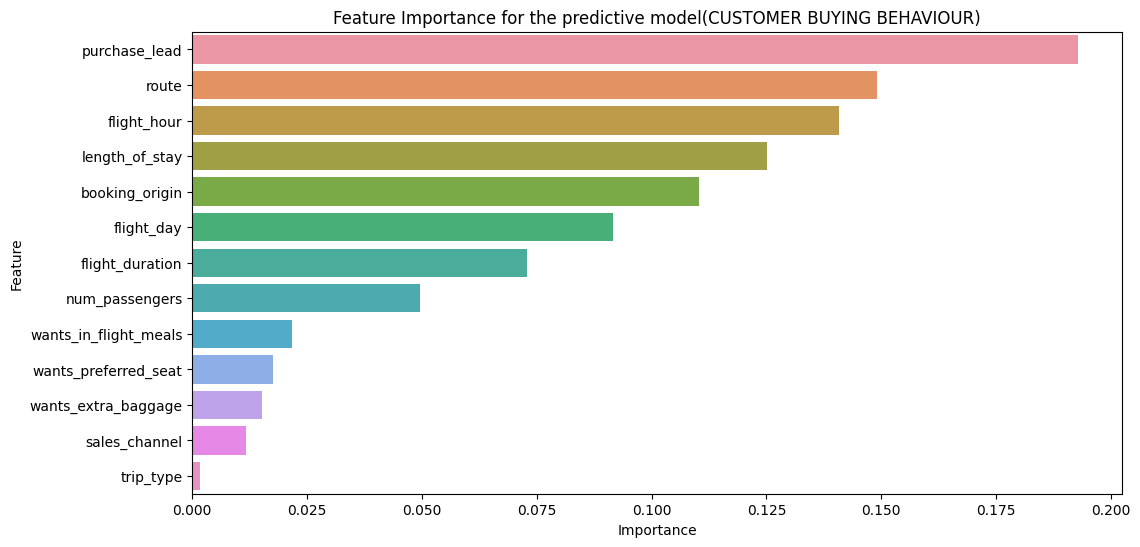

In [ ]:



# Get feature importances from the trained RandomForestClassifier model
feature_importances = model.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for the predictive model(CUSTOMER BUYING BEHAVIOUR)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


    From the above graph, we can see the features that affecting the performance of a predictive model.
    Flight meals, preferred seat, extra baggage were binary output columns we should neglect those to improve the accuracy of the model.
    In addition, sales channel, trip type and number of passengers can be dropped to increase the accuracy of our model before developing a model predicting with real data.
    